In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [33]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from tqdm import tqdm
from google.colab import files
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np

In [51]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/IA-Challenge/df_cluster_ve.csv', sep=',').drop(columns=['Unnamed: 0'])
df['date_arrete'] = pd.to_datetime(df['date_arrete'])
df['nb_vp_rechargeables_el'] = [int(x) for x in df['nb_vp_rechargeables_el']]
df['emissions'] = [round(x, 2) for x in df['emissions']]
df['TMJA'] = [round(x, 2) for x in df['TMJA']]
df['month'] = [x.month for x in df['date_arrete']]
df['year'] = [x.year for x in df['date_arrete']]
df = df.drop(columns=['date_arrete'])
df = df.sort_values(by=['cluster', 'year', 'month'])

In [52]:
df

,cluster,nb_vp_rechargeables_el,emissions,TMJA,month,year
0,0,0,327.11,19921.84,3,2014
1,0,0,327.11,19921.84,6,2014
2,0,0,327.11,19921.84,9,2014
3,0,0,327.11,19921.84,12,2014
4,0,1,331.58,22018.90,3,2015
...,...,...,...,...,...,...
1363,39,2732,305.96,49829.88,12,2021
1364,39,3995,305.96,49829.88,3,2022
1365,39,4002,305.96,49829.88,6,2022
1366,39,4043,305.96,49829.88,9,2022


In [53]:
def train_test(year, cluster):
  df_ = df[df['cluster'] == cluster]
  df_train = df_[df_['year']<=year]
  df_test = df_[df_['year']>year]

  y_test = df_test['nb_vp_rechargeables_el']
  X_test = df_test[['cluster', 'emissions', 'TMJA', 'month', 'year']]

  y_train = df_train['nb_vp_rechargeables_el']
  X_train = df_train[['cluster', 'emissions', 'TMJA', 'month', 'year']]

  y = df_['nb_vp_rechargeables_el']
  X = df_[['cluster', 'emissions', 'TMJA', 'month', 'year']]

  return X_train, y_train, X_test, y_test, X, y

X_train, y_train, X_test, y_test, X, y = train_test(2020, 20)

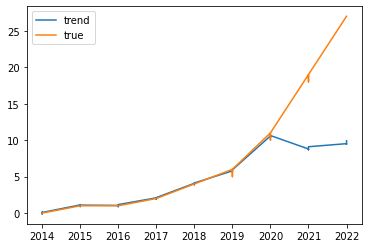

In [67]:
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly = poly.fit_transform(X)

trend_model = LinearRegression()
trend_model.fit(X_poly_train, y_train)

trend = trend_model.predict(X_poly)

plt.plot(X['year'], trend, label='trend')
plt.plot(X['year'], y, label='true')
plt.legend()